Name: Devraj

Project: Credit Risk Modelling - Loan Classification (Major project)

Batch: AI-ML May Batch

# Importing necessary libraries

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Setting the visual style
sns.set(style="whitegrid")

# Display a message confirming the import
"All relevant libraries and modules imported successfully."

'All relevant libraries and modules imported successfully.'

In [10]:

file_path = '"D:/Codes/JN/loan_detection.csv"'

loan_data = pd.read_csv("D:/Codes/JN/loan_detection.csv")

print(loan_data.head())


   age  campaign  pdays  previous  no_previous_contact  not_working  \
0   56         1    999         0                    1            0   
1   57         1    999         0                    1            0   
2   37         1    999         0                    1            0   
3   40         1    999         0                    1            0   
4   56         1    999         0                    1            0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
0           0                0                 0              1  ...   
1           0                0                 0              0  ...   
2           0                0                 0              0  ...   
3           1                0                 0              0  ...   
4           0                0                 0              0  ...   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0          0                0                1                0   
1     

# Check for missing data


In [13]:

missing_data = loan_data.isnull().sum()
missing_data[missing_data > 0]


Series([], dtype: int64)

In [14]:
# Check for duplicate data
duplicate_data = loan_data.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_data)

Number of Duplicate Rows: 2417


In [17]:
# Optionally, display the duplicate rows (if any)
duplicates = loan_data[loan_data.duplicated()]
print(duplicates)

# Remove duplicate rows
loan_data_cleaned = loan_data.drop_duplicates()

# Confirm removal by checking the shape of the DataFrame
print(f"Shape before removing duplicates: {loan_data.shape}")
print(f"Shape after removing duplicates: {loan_data_cleaned.shape}")

       age  campaign  pdays  previous  no_previous_contact  not_working  \
10      41         1    999         0                    1            0   
11      25         1    999         0                    1            0   
16      35         1    999         0                    1            0   
31      59         1    999         0                    1            0   
104     52         1    999         0                    1            0   
...    ...       ...    ...       ...                  ...          ...   
40928   21         1    999         0                    1            1   
41131   58         1    999         0                    1            0   
41167   32         3    999         0                    1            0   
41172   31         1    999         0                    1            0   
41181   37         1    999         0                    1            0   

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
10              0      

# Check for outliers in numerical features using boxplots

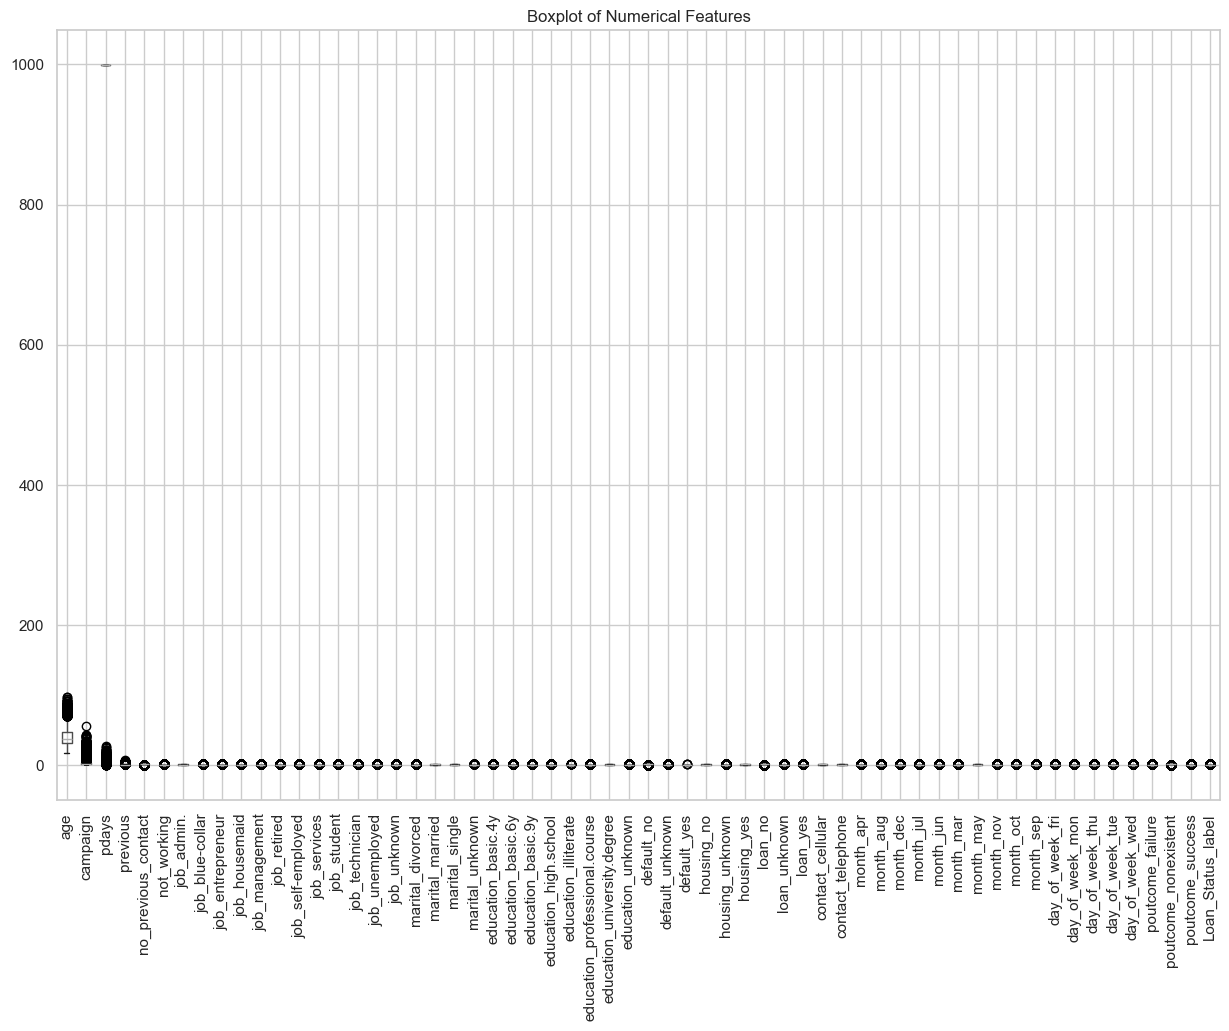

In [18]:

numerical_features = loan_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
loan_data[numerical_features].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

# Visualize the distribution of the target variable

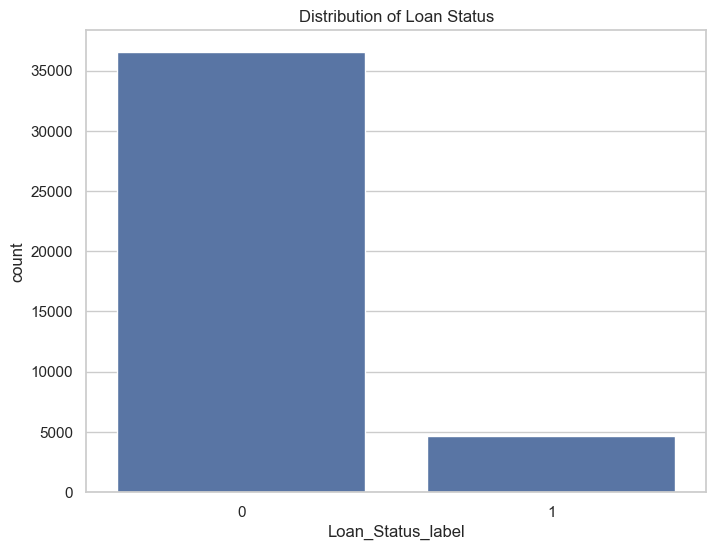

In [20]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status_label', data=loan_data)
plt.title("Distribution of Loan Status")
plt.show()


In [ ]:
# Performing tests on the data

In [23]:
X = loan_data.drop(columns=['Loan_Status_label'])  # Independent variables
y = loan_data['Loan_Status_label']  # Dependent variable

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.89
Confusion Matrix:
 [[10632   336]
 [ 1036   353]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.51      0.25      0.34      1389

    accuracy                           0.89     12357
   macro avg       0.71      0.61      0.64     12357
weighted avg       0.87      0.89      0.87     12357



# Visualizing the data with graphs

# List of numerical features
numerical_features = ['age', 'campaign', 'pdays', 'previous']  # Adjust this list based on your data

# Plotting the distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(loan_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# Jobs combined

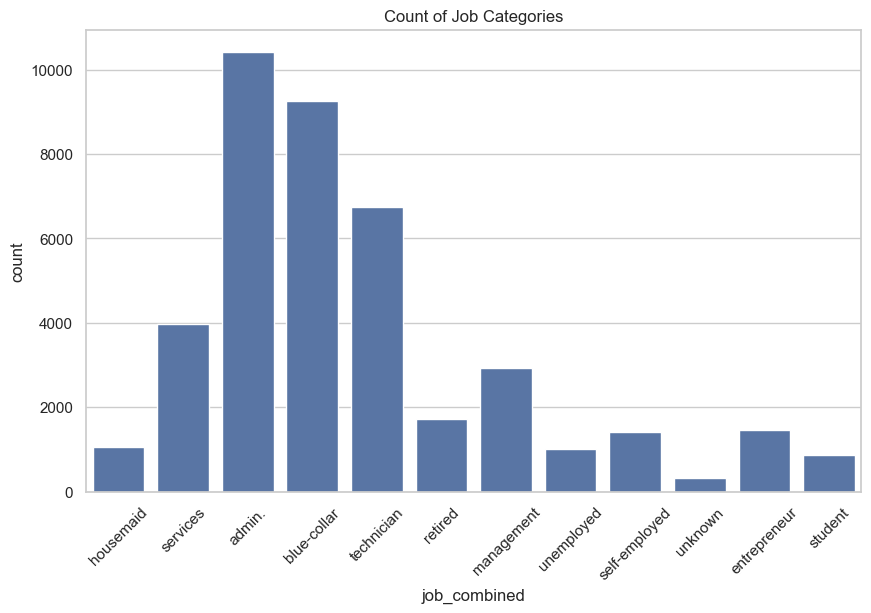

In [32]:

job_columns = [col for col in loan_data.columns if col.startswith('job_')]
loan_data['job_combined'] = loan_data[job_columns].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# Plotting count plot for the combined 'job' column
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x='job_combined')
plt.title('Count of Job Categories')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#individual job titles


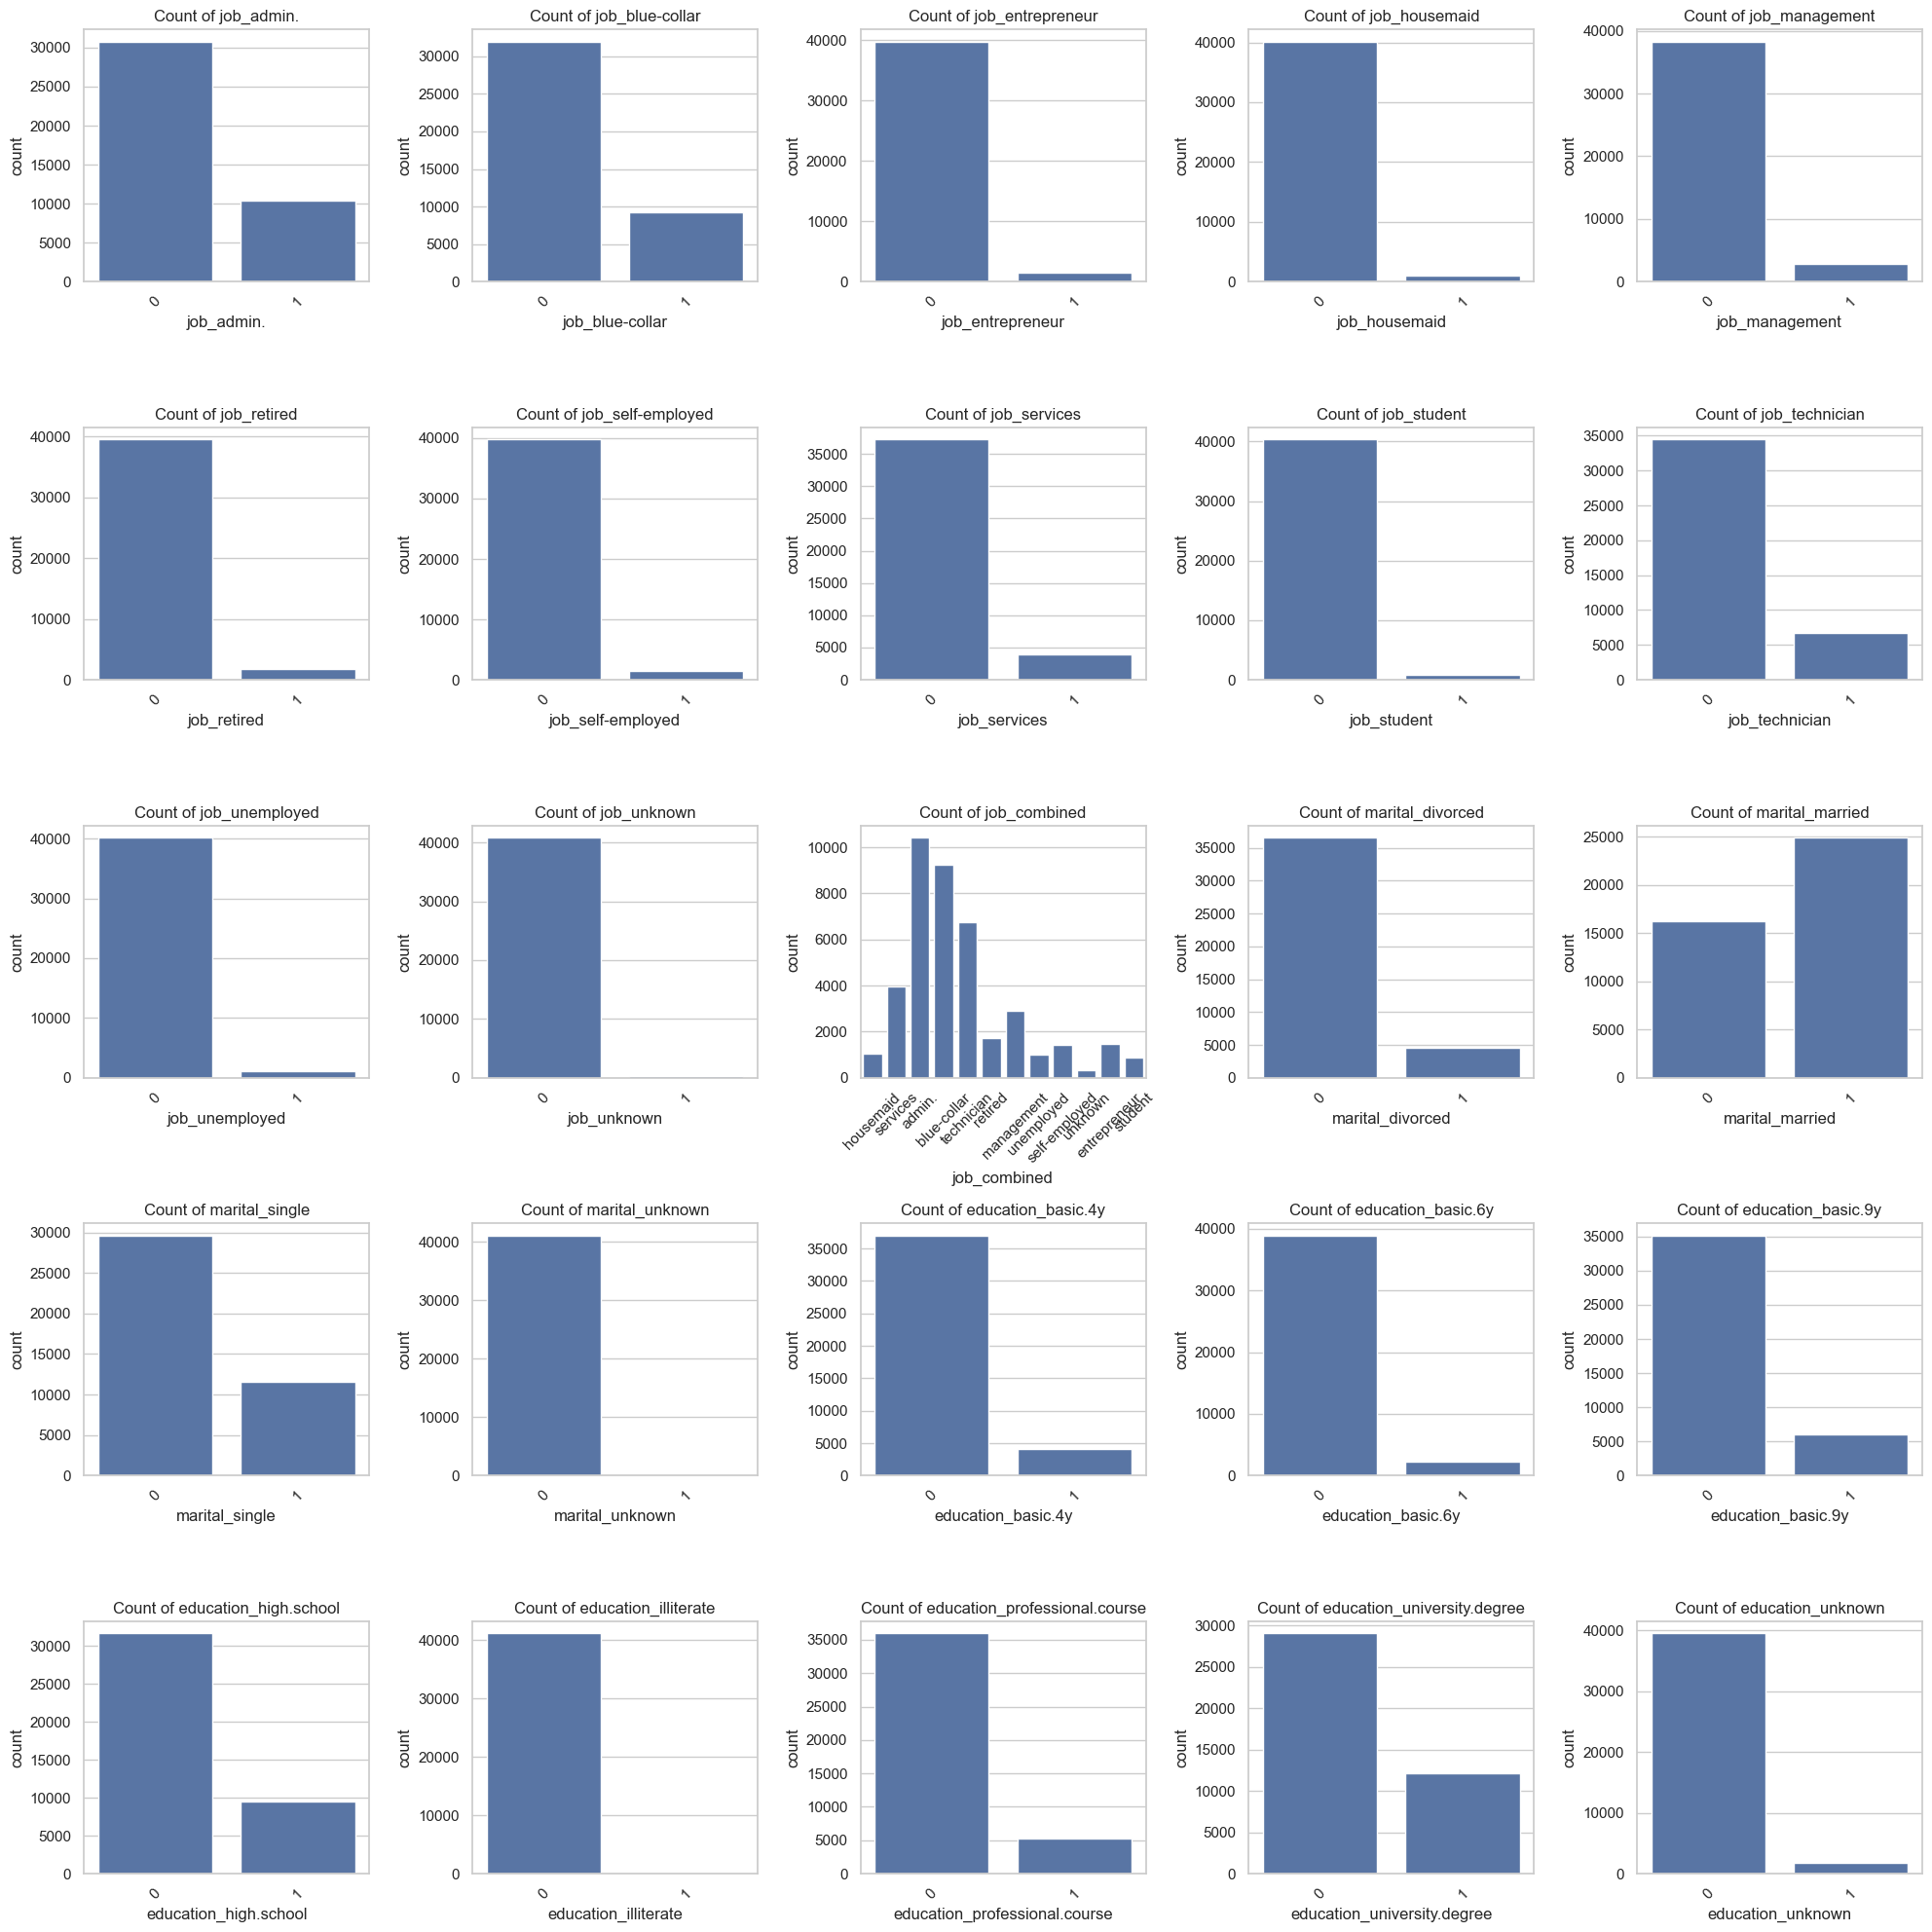

In [33]:

job_columns = [col for col in loan_data.columns if col.startswith('job_')]
marital_columns = [col for col in loan_data.columns if col.startswith('marital_')]
education_columns = [col for col in loan_data.columns if col.startswith('education_')]

# Concatenate these lists
categorical_features = job_columns + marital_columns + education_columns

# Plotting count plots for each one-hot encoded category
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 5, i + 1)
    sns.countplot(data=loan_data, x=feature)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


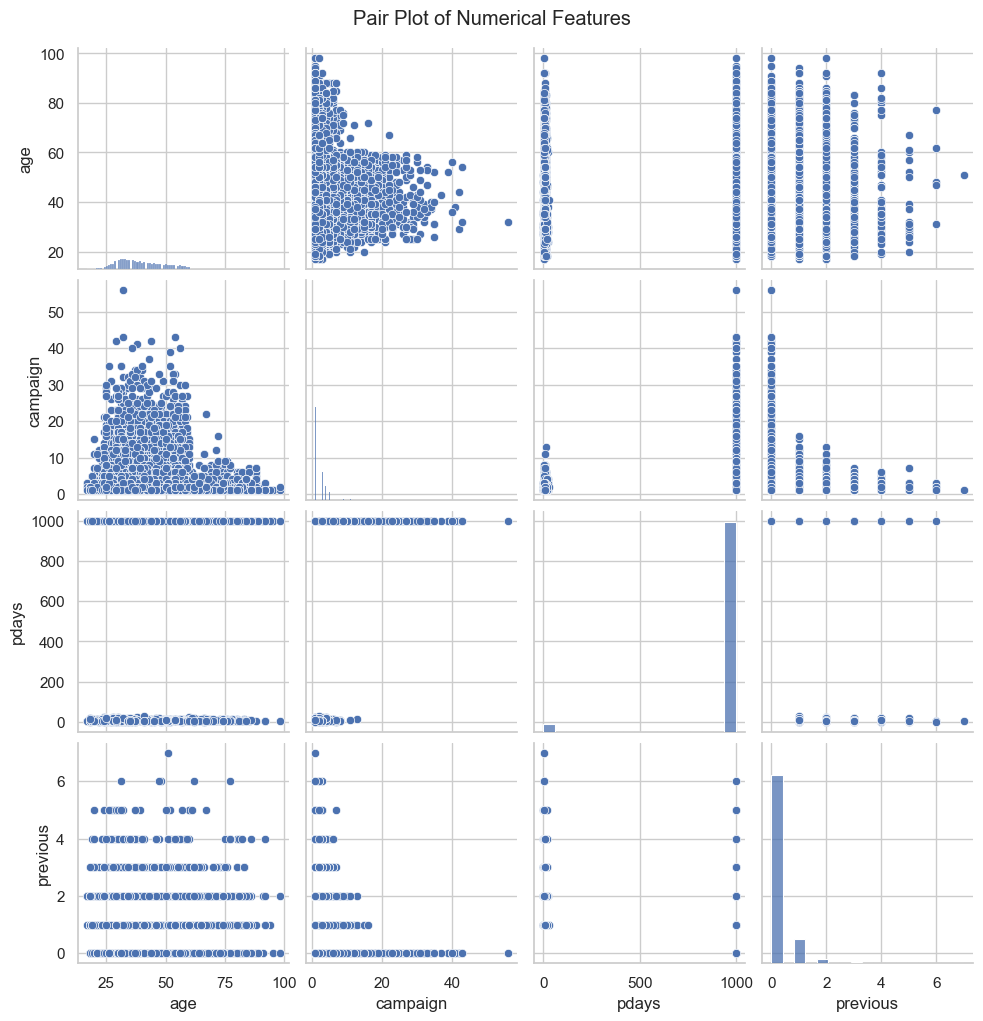

In [37]:
# Pair plot of numerical features
sns.pairplot(loan_data[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


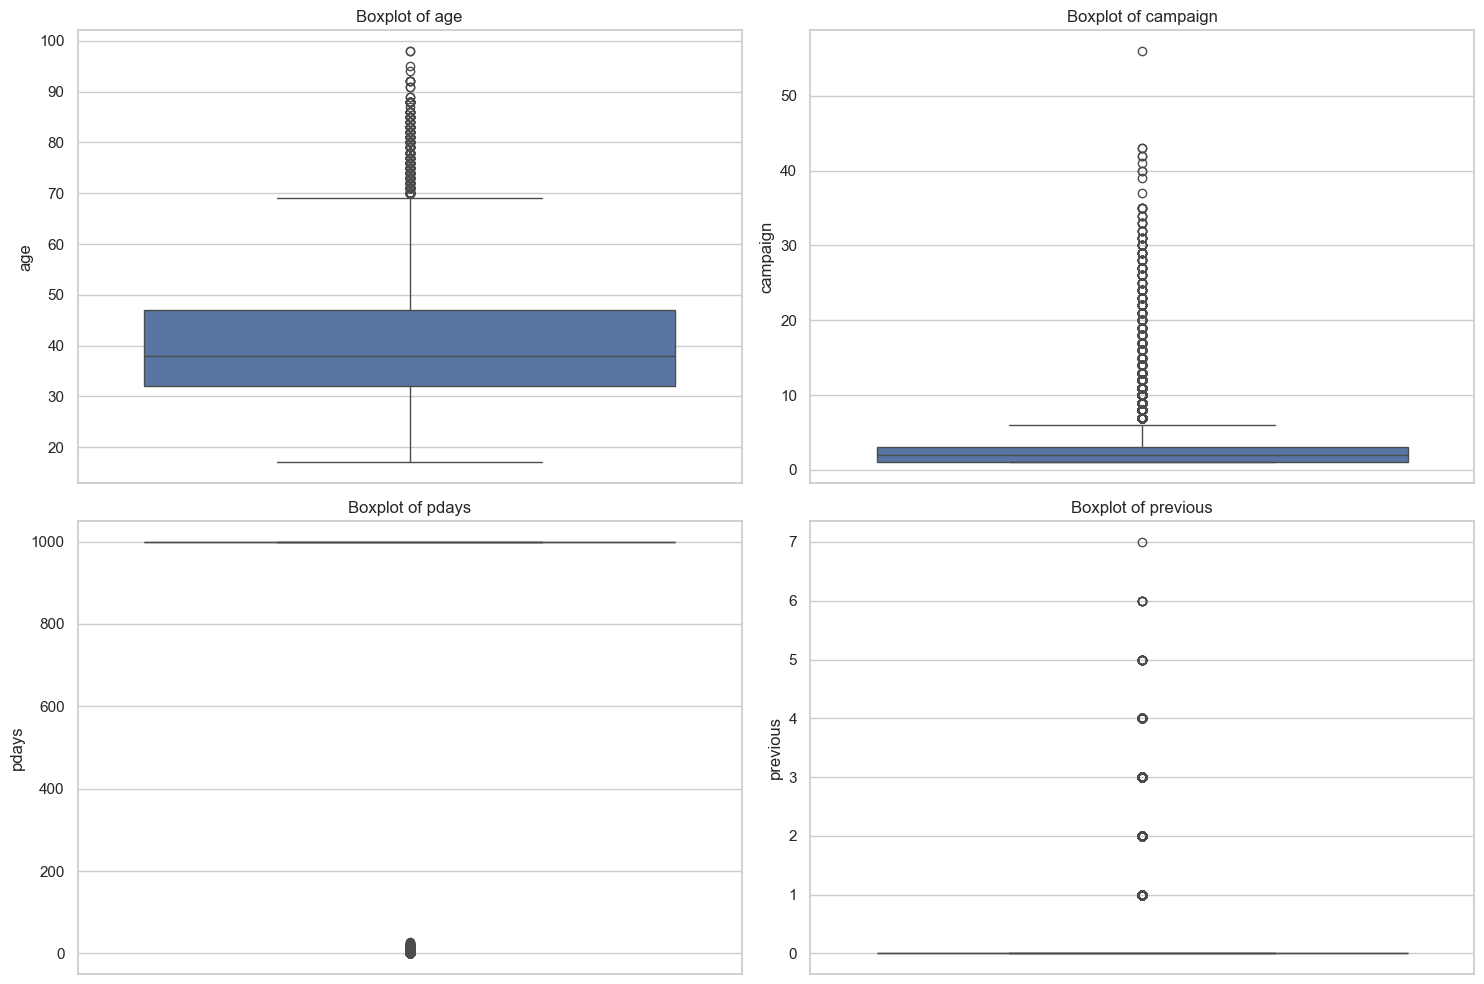

In [38]:
# Plotting boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=loan_data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


# Distribution of loan status

In [ ]:
# 1= yes & 0 = no 

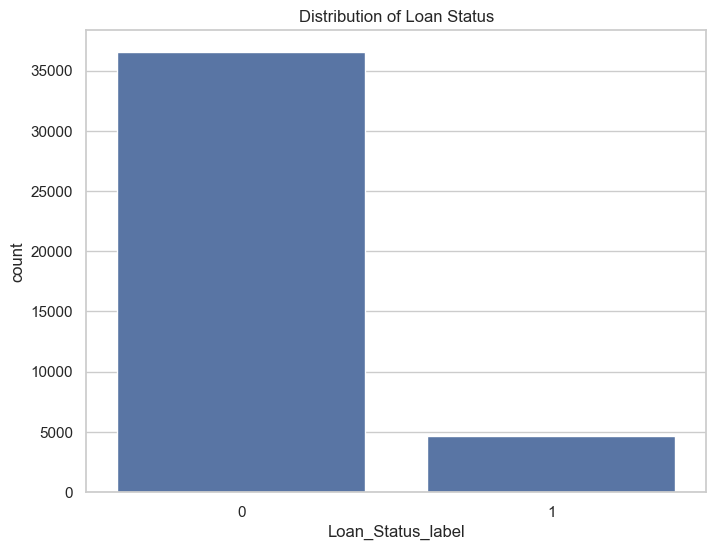

In [39]:
# Count plot for target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status_label', data=loan_data)
plt.title('Distribution of Loan Status')
plt.show()
